## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import datetime
import matplotlib.pyplot as plt


In [2]:
df_TrainPassenger = pd.read_csv(r'C:\Users\zarah\Desktop\Lighthouse Labs\Week6\MidTerm\DataFiles\Train_DataFiles\train_passengers_subset.csv')
df_TrainFlight = pd.read_csv(r'C:\Users\zarah\Desktop\Lighthouse Labs\Week6\MidTerm\DataFiles\Train_DataFiles\train_flights_subset.csv')
df_TrainFuel = pd.read_csv(r'C:\Users\zarah\Desktop\Lighthouse Labs\Week6\MidTerm\DataFiles\Train_DataFiles\train_fuel_subset.csv')

Task 6: How many states cover 50% of US air traffic?

In [3]:
#df_TrainPassenger.info()

#len(df_TrainPassenger)

df_T6= df_TrainPassenger[['departures_scheduled', 'departures_performed','origin','origin_city_name','origin_country','origin_country_name', 'dest','dest_city_name', 'dest_country','dest_country_name', 'year','month','region']].copy()
df_T6.columns

Index(['departures_scheduled', 'departures_performed', 'origin',
       'origin_city_name', 'origin_country', 'origin_country_name', 'dest',
       'dest_city_name', 'dest_country', 'dest_country_name', 'year', 'month',
       'region'],
      dtype='object')

In [4]:
df_origin_US = df_T6[(df_T6['origin_country'] == "US")]

df_origin_US[['origin_city_name','origin_state']] = df_origin_US.origin_city_name.str.split(",",n=1,expand=True)

df_origin_US


C:\Users\zarah\AppData\Local\Temp\ipykernel_25948\3349244901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_origin_US[['origin_city_name','origin_state']] = df_origin_US.origin_city_name.str.split(",",n=1,expand=True)
C:\Users\zarah\AppData\Local\Temp\ipykernel_25948\3349244901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_origin_US[['origin_city_name','origin_state']] = df_origin_US.origin_city_name.str.split(",",n=1,expand=True)


,departures_scheduled,departures_performed,origin,origin_city_name,origin_country,origin_country_name,dest,dest_city_name,dest_country,dest_country_name,year,month,region,origin_state
1,9,7,LAX,Los Angeles,US,United States,SLC,"Salt Lake City, UT",US,United States,2018,3,D,CA
2,88,88,FAT,Fresno,US,United States,DEN,"Denver, CO",US,United States,2015,10,D,CA
3,58,56,IND,Indianapolis,US,United States,PHL,"Philadelphia, PA",US,United States,2015,3,D,IN
4,58,56,TUS,Tucson,US,United States,ORD,"Chicago, IL",US,United States,2015,10,D,AZ
5,30,30,MIA,Miami,US,United States,CTG,"Cartagena, Colombia",CO,Colombia,2018,5,L,FL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,1,MCO,Orlando,US,United States,MDT,"Harrisburg, PA",US,United States,2018,11,D,FL
6996,15,24,SEA,Seattle,US,United States,GEG,"Spokane, WA",US,United States,2016,5,D,WA
6997,9,9,TPA,Tampa,US,United States,MEM,"Memphis, TN",US,United States,2019,12,D,FL
6998,2,2,IAH,Houston,US,United States,MEX,"Mexico City, Mexico",MX,Mexico,2016,6,L,TX


In [5]:
df_origin_US_grouped= df_origin_US.groupby('origin_state')['departures_scheduled'].agg(['sum','count']).sort_values(by=['sum'],ascending=False).reset_index()

source = "origin"
df_origin_US_grouped['Source']= source

df_origin_US_grouped.rename(columns={"origin_state": "State"}, inplace=True)

df_origin_US_grouped




,State,sum,count,Source
0,CA,14972,487,origin
1,TX,11465,461,origin
2,FL,9350,516,origin
3,NY,8160,289,origin
4,IL,7940,284,origin
5,GA,6171,217,origin
6,HI,4806,64,origin
7,NC,4722,155,origin
8,CO,4703,228,origin
9,PA,4485,168,origin


In [6]:
df_dest_US = df_T6[(df_T6['dest_country'] == "US")]

df_dest_US[['dest_cityName', 'dest_state']] = df_dest_US.dest_city_name.str.split(",",n=1,expand=True)

df_dest_US



C:\Users\zarah\AppData\Local\Temp\ipykernel_25948\766530444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dest_US[['dest_cityName', 'dest_state']] = df_dest_US.dest_city_name.str.split(",",n=1,expand=True)
C:\Users\zarah\AppData\Local\Temp\ipykernel_25948\766530444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dest_US[['dest_cityName', 'dest_state']] = df_dest_US.dest_city_name.str.split(",",n=1,expand=True)


,departures_scheduled,departures_performed,origin,origin_city_name,origin_country,origin_country_name,dest,dest_city_name,dest_country,dest_country_name,year,month,region,dest_cityName,dest_state
0,0,18,BDA,"Hamilton, Bermuda",BM,Bermuda,EWR,"Newark, NJ",US,United States,2019,11,I,Newark,NJ
1,9,7,LAX,"Los Angeles, CA",US,United States,SLC,"Salt Lake City, UT",US,United States,2018,3,D,Salt Lake City,UT
2,88,88,FAT,"Fresno, CA",US,United States,DEN,"Denver, CO",US,United States,2015,10,D,Denver,CO
3,58,56,IND,"Indianapolis, IN",US,United States,PHL,"Philadelphia, PA",US,United States,2015,3,D,Philadelphia,PA
4,58,56,TUS,"Tucson, AZ",US,United States,ORD,"Chicago, IL",US,United States,2015,10,D,Chicago,IL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,30,30,CHS,"Charleston, SC",US,United States,MCO,"Orlando, FL",US,United States,2015,4,D,Orlando,FL
6995,0,1,MCO,"Orlando, FL",US,United States,MDT,"Harrisburg, PA",US,United States,2018,11,D,Harrisburg,PA
6996,15,24,SEA,"Seattle, WA",US,United States,GEG,"Spokane, WA",US,United States,2016,5,D,Spokane,WA
6997,9,9,TPA,"Tampa, FL",US,United States,MEM,"Memphis, TN",US,United States,2019,12,D,Memphis,TN


In [7]:
df_dest_US_grouped = df_dest_US.groupby('dest_state')['departures_scheduled'].agg(['sum','count']).sort_values(by=['sum'],ascending=False).reset_index()


source = "destination"
df_dest_US_grouped['Source']= source


df_dest_US_grouped.rename(columns={"dest_state": "State"}, inplace=True)

df_dest_US_grouped



,State,sum,count,Source
0,CA,15150,500,destination
1,TX,11438,485,destination
2,FL,9742,478,destination
3,IL,8565,306,destination
4,GA,7351,242,destination
5,NY,7204,293,destination
6,CO,5623,211,destination
7,NC,4837,175,destination
8,HI,4604,67,destination
9,PA,4464,198,destination


In [8]:
df_total_flights = pd.concat([df_origin_US_grouped, df_dest_US_grouped], axis=0)

df_total_flights.groupby(['State']).sum().sort_values(by=['sum'],ascending=False).reset_index()

df_total_flights



,State,sum,count,Source
0,CA,14972,487,origin
1,TX,11465,461,origin
2,FL,9350,516,origin
3,NY,8160,289,origin
4,IL,7940,284,origin
...,...,...,...,...
49,AR,259,23,destination
50,WY,215,9,destination
51,RI,189,16,destination
52,VT,161,9,destination


In [9]:
df_total_flights = df_total_flights.groupby('State')['sum'].agg(['sum']).sort_values(by=['sum'],ascending=False).reset_index()
df_total_flights['sum'].sum()
df_total_flights['sum'].sum()*0.5

136212.0

In [10]:
df7_plot = df_total_flights.head(8)
df7_plot

,State,sum
0,CA,30122
1,TX,22903
2,FL,19092
3,IL,16505
4,NY,15364
5,GA,13522
6,CO,10326
7,NC,9559


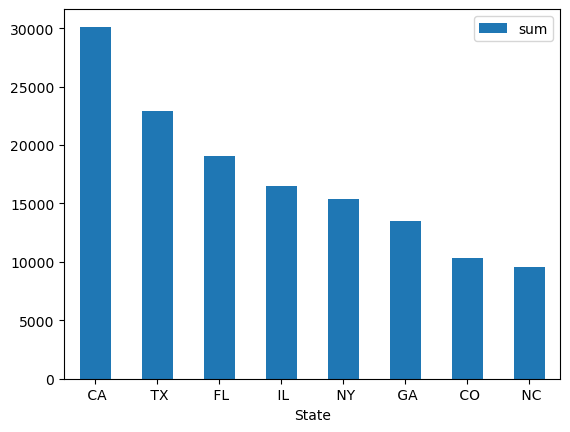

In [11]:
df = df7_plot
ax = df.plot.bar(x='State', y='sum', rot=0)

In [12]:
#Total air trafic in US (Departures and Arrivals)
print(df_total_flights['sum'].sum())

mean = df_total_flights['sum'].mean()
print(mean)


272424
5044.888888888889


#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [13]:
df_TrainFlight

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-11-13,AA,AA_CODESHARE,AA,4850,PT,N657AE,4850,15096,SYR,...,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-08,B6,B6,B6,168,B6,N633JB,168,13796,OAK,...,2576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-08-01,UA,UA_CODESHARE,UA,5068,OO,N975SW,5068,11027,CKB,...,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-02-27,WN,WN,WN,388,WN,N968WN,388,10821,BWI,...,430,48.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2019-05-27,WN,WN,WN,1353,WN,N8575Z,1353,12339,IND,...,977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2018-03-26,AA,AA,AA,850,AA,N197UW,850,13303,MIA,...,1013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6996,2019-02-05,AA,AA,AA,2665,AA,N196AA,2665,14100,PHL,...,1013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6997,2018-12-26,AA,AA_CODESHARE,AA,5180,OH,N725PS,5180,11057,CLT,...,564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6998,2018-11-10,AA,AA,AA,576,AA,N188US,576,14893,SMF,...,2244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Created df with selected columns from the TrainFlight df
df_T7 = df_TrainFlight[['fl_date','origin_airport_id','op_carrier_fl_num','origin_city_name','dest_city_name', 'dep_time','distance','crs_dep_time','dep_delay','crs_arr_time','arr_time','arr_delay','crs_elapsed_time','actual_elapsed_time','air_time', 'taxi_out', 'taxi_in', 'wheels_off', 'wheels_on','cancelled','diverted']]

print(df_T7.shape)

(7000, 21)


In [15]:
#Removed all flights that were cancelled AND divereted 
df_T7 = df_T7[(df_T7['cancelled'] == 0) & (df_T7['diverted'] == 0) ]
print(df_T7.shape)



(6869, 21)


#Removed all flights that didn't have any departure delay (Removed all flights that had ontime departure)
df_T7 = df_T7[(df_T7['dep_delay'] > 0)]
print(df_T7.shape)


dep_delay: Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.
arr_delay: Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
air_time: Flight Time, in Minutes
crs_elapsed_time: CRS Elapsed Time of Flight, in Minutes - SCHEDULED TIME OF FLIGHT
actual_elapsed_time: Elapsed Time of Flight, in Minutes - ACTUAL TIME OF FLIGHT

In [16]:
#Created another df with specific columns related to time and 
df_T7_summary = df_T7[['fl_date','dest_city_name','dep_time','arr_time','dep_delay','arr_delay','air_time', 'distance']].reset_index(drop=True)
df_T7_summary['Speed']=(df_T7_summary['distance']/df_T7_summary['air_time'])*60 #speed(miles/hour) = distance divided by airtime
df_T7_summary

,fl_date,dest_city_name,dep_time,arr_time,dep_delay,arr_delay,air_time,distance,Speed
0,2019-11-13,"Philadelphia, PA",1306.0,1408.0,-9.0,-31.0,48.0,228,285.000000
1,2019-12-08,"New York, NY",2337.0,807.0,-7.0,4.0,302.0,2576,511.788079
2,2018-08-01,"Washington, DC",606.0,653.0,-4.0,-21.0,30.0,151,302.000000
3,2018-02-27,"Cincinnati, OH",926.0,1058.0,61.0,48.0,74.0,430,348.648649
4,2019-05-27,"Denver, CO",638.0,731.0,-2.0,6.0,157.0,977,373.375796
...,...,...,...,...,...,...,...,...,...
6864,2018-03-26,"Philadelphia, PA",902.0,1151.0,-3.0,-5.0,147.0,1013,413.469388
6865,2019-02-05,"Miami, FL",1041.0,1318.0,-9.0,-38.0,137.0,1013,443.649635
6866,2018-12-26,"White Plains, NY",1117.0,1259.0,-3.0,-16.0,91.0,564,371.868132
6867,2018-11-10,"Charlotte, NC",2220.0,536.0,-8.0,-25.0,238.0,2244,565.714286


In [17]:
#Checking for NaN values in the speed column and dropping those index
df_T7_summary['Speed'].isnull().values.any()
df_T7_summary['Speed'].isnull().sum()

df_T7_summary = df_T7_summary.dropna()

df_T7_summary.shape

(6865, 9)

from scipy import stats
stat, p = stats.pearsonr(df_T7_summary['dep_delay'], df_T7_summary['Speed'],)
print('%0.60f' % p, stat)


In [18]:
#Dataset with all delayed flights

speed_with_delay=df_T7_summary.loc[(df_T7_summary['dep_delay']>0.0), 'Speed']

print(speed_with_delay.count())


2314


In [19]:
#Dataset with all early departure flights

speed_without_delay=df_T7_summary.loc[(df_T7_summary['dep_delay']<=0.0), 'Speed']

print(speed_without_delay.count())


4551


In [20]:
#one-way ANOVA
stats.f_oneway(speed_with_delay, speed_without_delay)


F_onewayResult(statistic=10.917642268717785, pvalue=0.0009574090703015269)

In [21]:
#T-Test
stats.ttest_ind(speed_with_delay, speed_without_delay)


Ttest_indResult(statistic=3.3041855681419907, pvalue=0.0009574090703039511)

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [22]:
df_TrainFlight
df_T8 = df_TrainFlight.copy()

print(df_T8.shape)

(7000, 42)


In [23]:
df_T8 = df_T8[(df_T8['cancelled'] == 0) & (df_T8['diverted'] == 0) ]
print(df_T8.shape)

(6869, 42)


In [24]:
df_T8_1 = df_T8[['fl_date', 'flights','mkt_carrier_fl_num','dep_time','air_time', 'distance']]
df_T8_1

,fl_date,flights,mkt_carrier_fl_num,dep_time,air_time,distance
0,2019-11-13,1,4850,1306.0,48.0,228
1,2019-12-08,1,168,2337.0,302.0,2576
2,2018-08-01,1,5068,606.0,30.0,151
3,2018-02-27,1,388,926.0,74.0,430
4,2019-05-27,1,1353,638.0,157.0,977
...,...,...,...,...,...,...
6995,2018-03-26,1,850,902.0,147.0,1013
6996,2019-02-05,1,2665,1041.0,137.0,1013
6997,2018-12-26,1,5180,1117.0,91.0,564
6998,2018-11-10,1,576,2220.0,238.0,2244


In [25]:
#convert to datetime
def convert_time(x):
    if np.isnan(x):
        return '00:00'
    
    if x == 2400:
        return '23:59'   
    string = str(int(x))
    
    if len(string)< 4:
        for _ in range(4-len(string)):
            string = '0' + string
    
    return string[:2] + ':' + string[2:]

In [26]:
df_T8_1['dep_time'] = pd.to_datetime(df_T8_1['dep_time'].apply(lambda x: convert_time(x)))


C:\Users\zarah\AppData\Local\Temp\ipykernel_25948\734026020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_T8_1['dep_time'] = pd.to_datetime(df_T8_1['dep_time'].apply(lambda x: convert_time(x)))


In [27]:
df_T8_1.loc[:, 'hour'] = df_T8_1['dep_time'].dt.hour


C:\Users\zarah\AppData\Local\Temp\ipykernel_25948\164656096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_T8_1.loc[:, 'hour'] = df_T8_1['dep_time'].dt.hour


In [28]:
df_T8_1

,fl_date,flights,mkt_carrier_fl_num,dep_time,air_time,distance,hour
0,2019-11-13,1,4850,2023-02-23 13:06:00,48.0,228,13
1,2019-12-08,1,168,2023-02-23 23:37:00,302.0,2576,23
2,2018-08-01,1,5068,2023-02-23 06:06:00,30.0,151,6
3,2018-02-27,1,388,2023-02-23 09:26:00,74.0,430,9
4,2019-05-27,1,1353,2023-02-23 06:38:00,157.0,977,6
...,...,...,...,...,...,...,...
6995,2018-03-26,1,850,2023-02-23 09:02:00,147.0,1013,9
6996,2019-02-05,1,2665,2023-02-23 10:41:00,137.0,1013,10
6997,2018-12-26,1,5180,2023-02-23 11:17:00,91.0,564,11
6998,2018-11-10,1,576,2023-02-23 22:20:00,238.0,2244,22


In [29]:
df_T8_1['dep_time'] = df_T8_1['dep_time'].astype(str).apply(lambda x: x.split(' ')[-1])
df_T8_1

C:\Users\zarah\AppData\Local\Temp\ipykernel_25948\2998831106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_T8_1['dep_time'] = df_T8_1['dep_time'].astype(str).apply(lambda x: x.split(' ')[-1])


,fl_date,flights,mkt_carrier_fl_num,dep_time,air_time,distance,hour
0,2019-11-13,1,4850,13:06:00,48.0,228,13
1,2019-12-08,1,168,23:37:00,302.0,2576,23
2,2018-08-01,1,5068,06:06:00,30.0,151,6
3,2018-02-27,1,388,09:26:00,74.0,430,9
4,2019-05-27,1,1353,06:38:00,157.0,977,6
...,...,...,...,...,...,...,...
6995,2018-03-26,1,850,09:02:00,147.0,1013,9
6996,2019-02-05,1,2665,10:41:00,137.0,1013,10
6997,2018-12-26,1,5180,11:17:00,91.0,564,11
6998,2018-11-10,1,576,22:20:00,238.0,2244,22


air_time is in minutes 
    1. short flights:30 mins to 180 mins (1/2hr to 3hrs)
    2. medium flights: 181 mins to 360 mins (3hr to 6hrs)
    3.long flights: above 360 mins (above 6hrs)


In [30]:
df_T8_1['haul_type'] = np.where((df_T8_1['air_time'] <=180), 'Short', np.where((df_T8_1['air_time'] > 180) & (df_T8_1['air_time'] <= 360), 'Medium', 'Long'))


C:\Users\zarah\AppData\Local\Temp\ipykernel_25948\2279525102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_T8_1['haul_type'] = np.where((df_T8_1['air_time'] <=180), 'Short', np.where((df_T8_1['air_time'] > 180) & (df_T8_1['air_time'] <= 360), 'Medium', 'Long'))


In [31]:
df_T8_1

,fl_date,flights,mkt_carrier_fl_num,dep_time,air_time,distance,hour,haul_type
0,2019-11-13,1,4850,13:06:00,48.0,228,13,Short
1,2019-12-08,1,168,23:37:00,302.0,2576,23,Medium
2,2018-08-01,1,5068,06:06:00,30.0,151,6,Short
3,2018-02-27,1,388,09:26:00,74.0,430,9,Short
4,2019-05-27,1,1353,06:38:00,157.0,977,6,Short
...,...,...,...,...,...,...,...,...
6995,2018-03-26,1,850,09:02:00,147.0,1013,9,Short
6996,2019-02-05,1,2665,10:41:00,137.0,1013,10,Short
6997,2018-12-26,1,5180,11:17:00,91.0,564,11,Short
6998,2018-11-10,1,576,22:20:00,238.0,2244,22,Medium


In [32]:
df_short_flights=df_T8_1.loc[df_T8_1['haul_type'] == 'Short']
df_medium_flights=df_T8_1.loc[df_T8_1['haul_type'] == 'Medium']
df_long_flights=df_T8_1.loc[df_T8_1['haul_type'] == 'Long']

In [33]:
df_short_flights.head()



,fl_date,flights,mkt_carrier_fl_num,dep_time,air_time,distance,hour,haul_type
0,2019-11-13,1,4850,13:06:00,48.0,228,13,Short
2,2018-08-01,1,5068,06:06:00,30.0,151,6,Short
3,2018-02-27,1,388,09:26:00,74.0,430,9,Short
4,2019-05-27,1,1353,06:38:00,157.0,977,6,Short
5,2019-06-12,1,3696,20:48:00,31.0,135,20,Short


In [34]:
mydict = df_short_flights
if 'hour' in mydict:
    print('key present')
else:
    print('key not found')


key present


In [35]:
df8_short=df_short_flights.groupby(by=[df_short_flights["hour"]])['flights'].count().sort_values(ascending=False)
df8_short


hour
15    416
8     401
14    386
12    360
9     358
17    355
6     346
11    344
13    341
16    341
7     330
18    328
20    318
10    317
19    314
5     251
21    192
22    147
23     32
4      16
0      13
1       8
2       4
3       2
Name: flights, dtype: int64

In [36]:
df8_medium=df_medium_flights.groupby(by=[df_medium_flights["hour"]])['flights'].count().sort_values(ascending=False)
df8_medium


hour
6     73
17    63
15    63
8     62
9     61
13    60
7     58
12    55
10    52
14    51
21    45
11    44
18    43
22    35
16    35
19    34
20    29
23    25
5     15
0      8
2      2
1      1
3      1
Name: flights, dtype: int64

In [37]:
df8_long=df_long_flights.groupby(by=[df_long_flights["hour"]])['flights'].count().sort_values(ascending=False)
df8_long

hour
17    6
16    5
10    4
15    4
9     3
7     2
11    2
18    2
5     1
13    1
14    1
20    1
21    1
23    1
Name: flights, dtype: int64

Text(0, 0.5, 'Number of Flights')

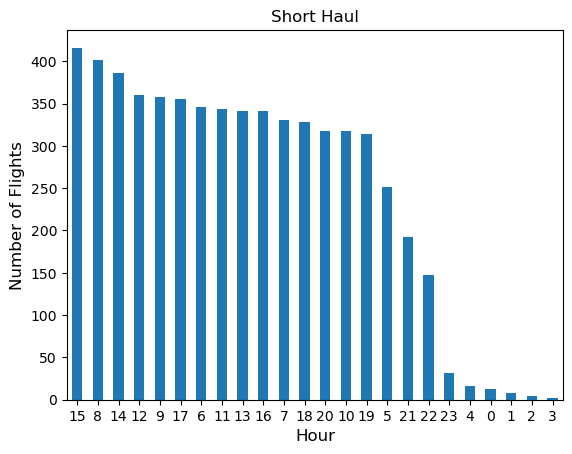

In [38]:
df = df8_short
ax = df.plot.bar(x='hour', y='sum', rot=0)
ax.set_title("Short Haul")
ax.set_xlabel("Hour",fontsize=12)
ax.set_ylabel("Number of Flights",fontsize=12)

Text(0, 0.5, 'Number of Flights')

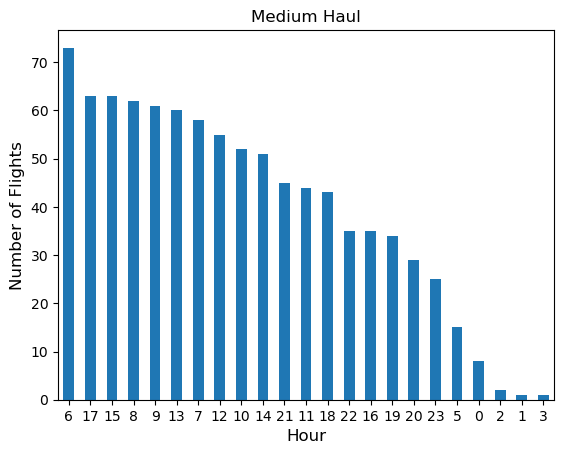

In [39]:
df = df8_medium
ax = df.plot.bar(x='hour', y='sum', rot=0)
ax.set_title("Medium Haul")
ax.set_xlabel("Hour",fontsize=12)
ax.set_ylabel("Number of Flights",fontsize=12)

Text(0, 0.5, 'Number of Flights')

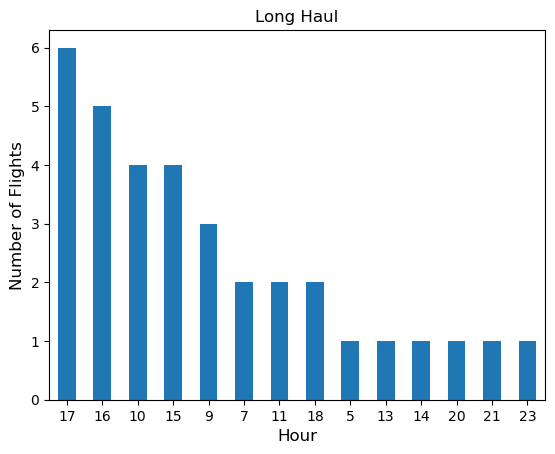

In [40]:
df = df8_long
ax = df.plot.bar(x='hour', y='sum', rot=0)
ax.set_title("Long Haul")
ax.set_xlabel("Hour",fontsize=12)
ax.set_ylabel("Number of Flights",fontsize=12)

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

a. Sum of departure performed by origin Airport
b. Sum of arrival flights by destination Airport. ***
c. Sum of departing passengers by origin Airport
d. Sum of arriving passengers by destination Arport.

In [41]:
df_T9 = df_TrainPassenger[['passengers', 'origin_airport_id','origin','departures_performed','dest','dest_airport_id']]
df_T9

,passengers,origin_airport_id,origin,departures_performed,dest,dest_airport_id
0,0,10521,BDA,18,EWR,11618
1,454,12892,LAX,7,SLC,14869
2,4042,11638,FAT,88,DEN,11292
3,2028,12339,IND,56,PHL,14100
4,6496,15376,TUS,56,ORD,13930
...,...,...,...,...,...,...
6995,109,13204,MCO,1,MDT,13230
6996,2091,14747,SEA,24,GEG,11884
6997,0,15304,TPA,9,MEM,13244
6998,321,12266,IAH,2,MEX,13252


In [42]:
# Get 30 busiest airport origin by flight count
df_T9_a = df_T9.groupby(['origin'])['departures_performed'].agg('sum').sort_values(ascending=False).head(10)
df_T9_a

origin
ORD    6563
ATL    5812
LAX    5161
JFK    4352
DEN    4185
SFO    3966
DFW    3616
CLT    3322
LAS    3265
PHL    3174
Name: departures_performed, dtype: int64

In [43]:
# Get 30 busiest airport destination by flight count
df_T9_b = df_T9.groupby(['dest'])['departures_performed'].agg('sum').sort_values(ascending=False).head(10)
df_T9_b


dest
ORD    7041
ATL    6483
DEN    4918
SFO    4737
LAX    4644
IAH    3949
HNL    3782
MSP    3713
CLT    3564
DFW    3517
Name: departures_performed, dtype: int64

Text(0, 0.5, 'Sum of Departed Flights')

<Figure size 640x480 with 0 Axes>

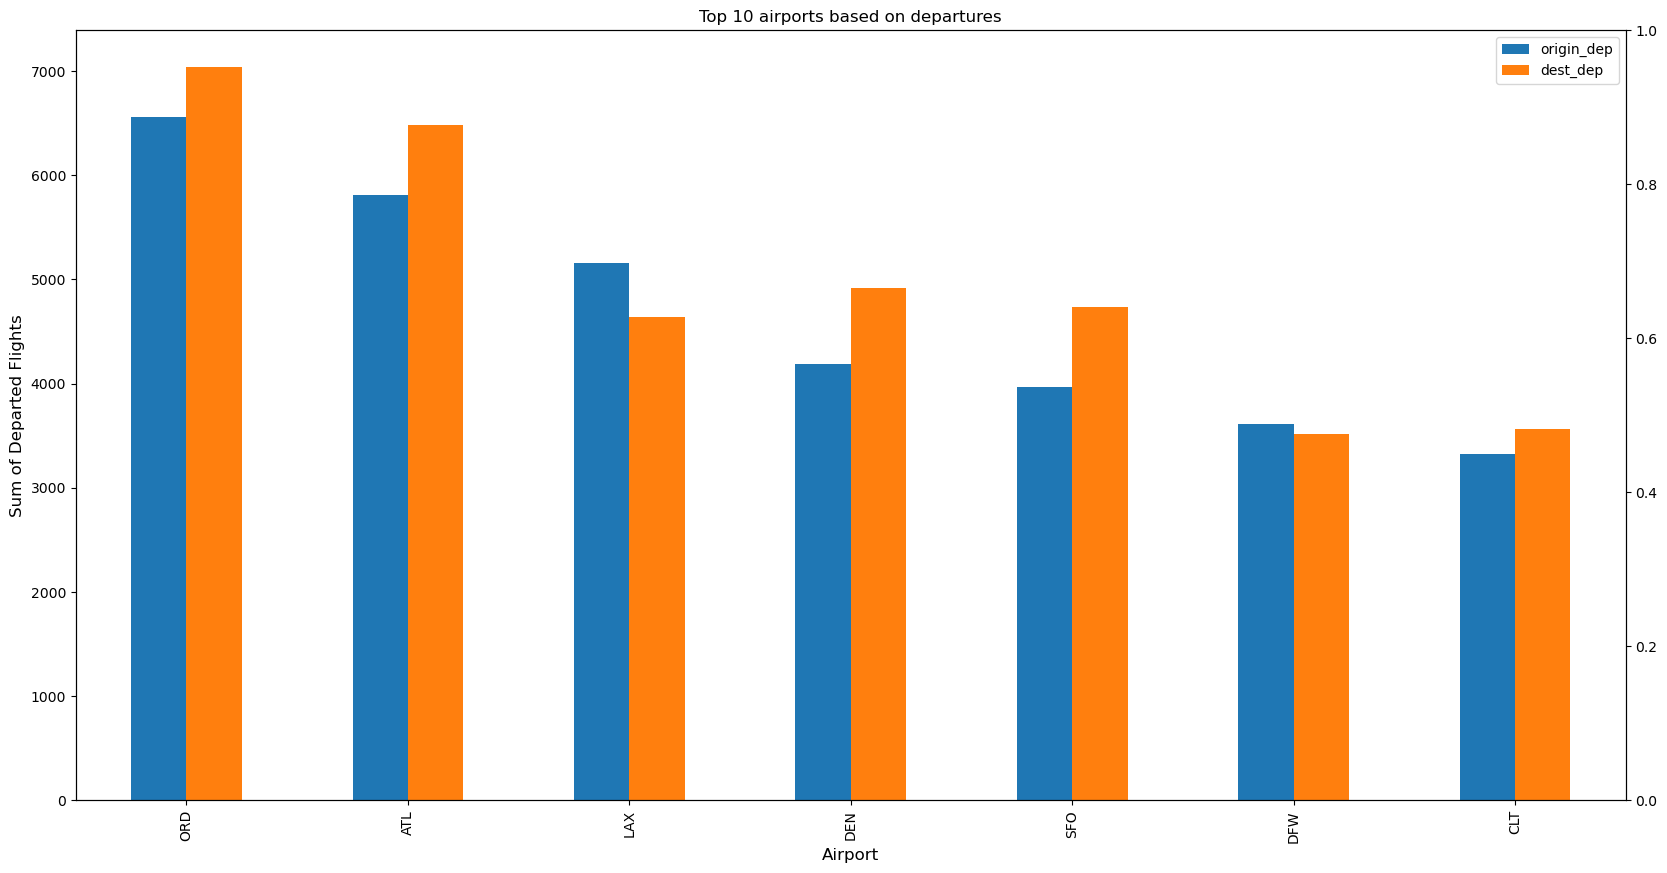

In [44]:
df9_flightcount = pd.merge(df_T9_a, df_T9_b, left_index=True, right_index=True)
df9_flightcount.rename(columns={"departures_performed_x":"origin_dep","departures_performed_y":"dest_dep"},inplace=True)
df9_flightcount


import matplotlib.pyplot as plt
fig = plt.figure()

ax = df9_flightcount[['origin_dep','dest_dep']].plot(kind='bar', use_index=True,figsize=(20,10))
ax2 = ax.twinx()

ax.set_title("Top 10 airports based on departures")
ax.set_xlabel("Airport",fontsize=12)
ax.set_ylabel("Sum of Departed Flights",fontsize=12)


In [45]:
# Get 30 busiest airport origin by passenger count

df_T9_c = df_T9.groupby(['origin'])['passengers'].agg('sum').sort_values(ascending=False).head(30)

df_T9_c

origin
ATL    693164
ORD    631507
LAX    614704
JFK    535476
SFO    521086
DEN    472245
LAS    432676
SEA    341636
DFW    306371
IAH    299184
MCO    296115
CLT    291796
EWR    278965
PHX    275658
LGA    275162
MIA    267569
BOS    262570
PHL    258057
MSP    249618
DTW    240610
FLL    235146
IAD    232838
BWI    198692
SLC    167454
OGG    162219
SAN    142995
DCA    139113
TPA    127302
MDW    127237
SNA    126910
Name: passengers, dtype: int64

In [46]:
# Get 30 busiest airport destination by passenger count

df_T9_d = df_T9.groupby(['dest'])['passengers'].agg('sum').sort_values(ascending=False).head(30)

df_T9_d

dest
ATL    763379
ORD    719379
SFO    585071
LAX    567187
DEN    509546
JFK    429016
HNL    424739
MIA    371551
MSP    358668
LAS    353669
IAH    349079
SEA    338864
DFW    333637
CLT    324752
DTW    311917
EWR    284346
BOS    277155
PHX    246646
PHL    244726
FLL    235690
MCO    230282
DCA    188904
SAN    187349
LGA    164190
BWI    162837
IAD    155906
DAL    143036
SLC    142342
MDW    136037
PDX    134159
Name: passengers, dtype: int64

In [47]:
df9_passengercount = pd.merge(df_T9_c, df_T9_d, left_index=True, right_index=True)
df9_passengercount.rename(columns={"passengers_x":"origin_departing_passengers","passengers_y":"dest_departing_passengers"},inplace=True)
df9_pas = df9_passengercount.head(10)



Text(0, 0.5, 'Sum of Passengers')

<Figure size 640x480 with 0 Axes>

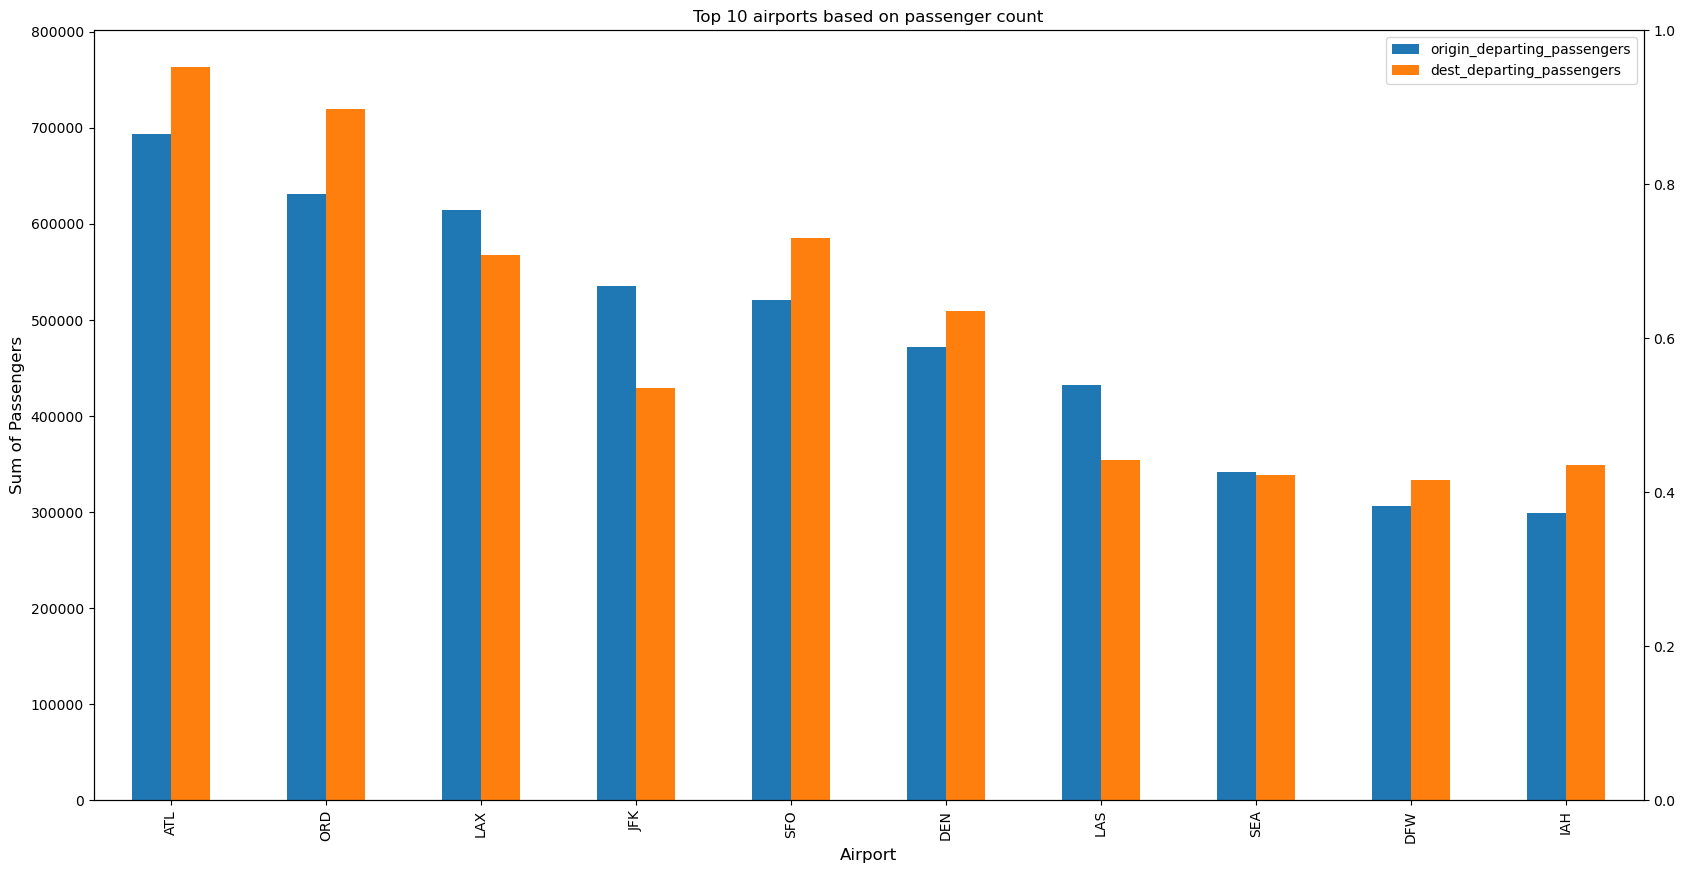

In [48]:

import matplotlib.pyplot as plt
fig = plt.figure()

ax = df9_pas[['origin_departing_passengers','dest_departing_passengers']].plot(kind='bar', use_index=True,figsize=(20,10))
ax2 = ax.twinx()

ax.set_title("Top 10 airports based on passenger count")
ax.set_xlabel("Airport",fontsize=12)
ax.set_ylabel("Sum of Passengers",fontsize=12)

In [49]:
# Merge 4 columns together by airport
df9_top30= pd.merge(df9_flightcount, df9_passengercount, left_index=True, right_index=True)
df9_top30.rename(columns={"departures_performed_x":"origin_dep","departures_performed_y":"dest_dep","passengers_x":"origin_departing_passengers","passengers_y":"dest_departing_passengers"},inplace=True)


In [50]:
df9_top30

,origin_dep,dest_dep,origin_departing_passengers,dest_departing_passengers
ORD,6563,7041,631507,719379
ATL,5812,6483,693164,763379
LAX,5161,4644,614704,567187
DEN,4185,4918,472245,509546
SFO,3966,4737,521086,585071
DFW,3616,3517,306371,333637
CLT,3322,3564,291796,324752


<Figure size 640x480 with 0 Axes>

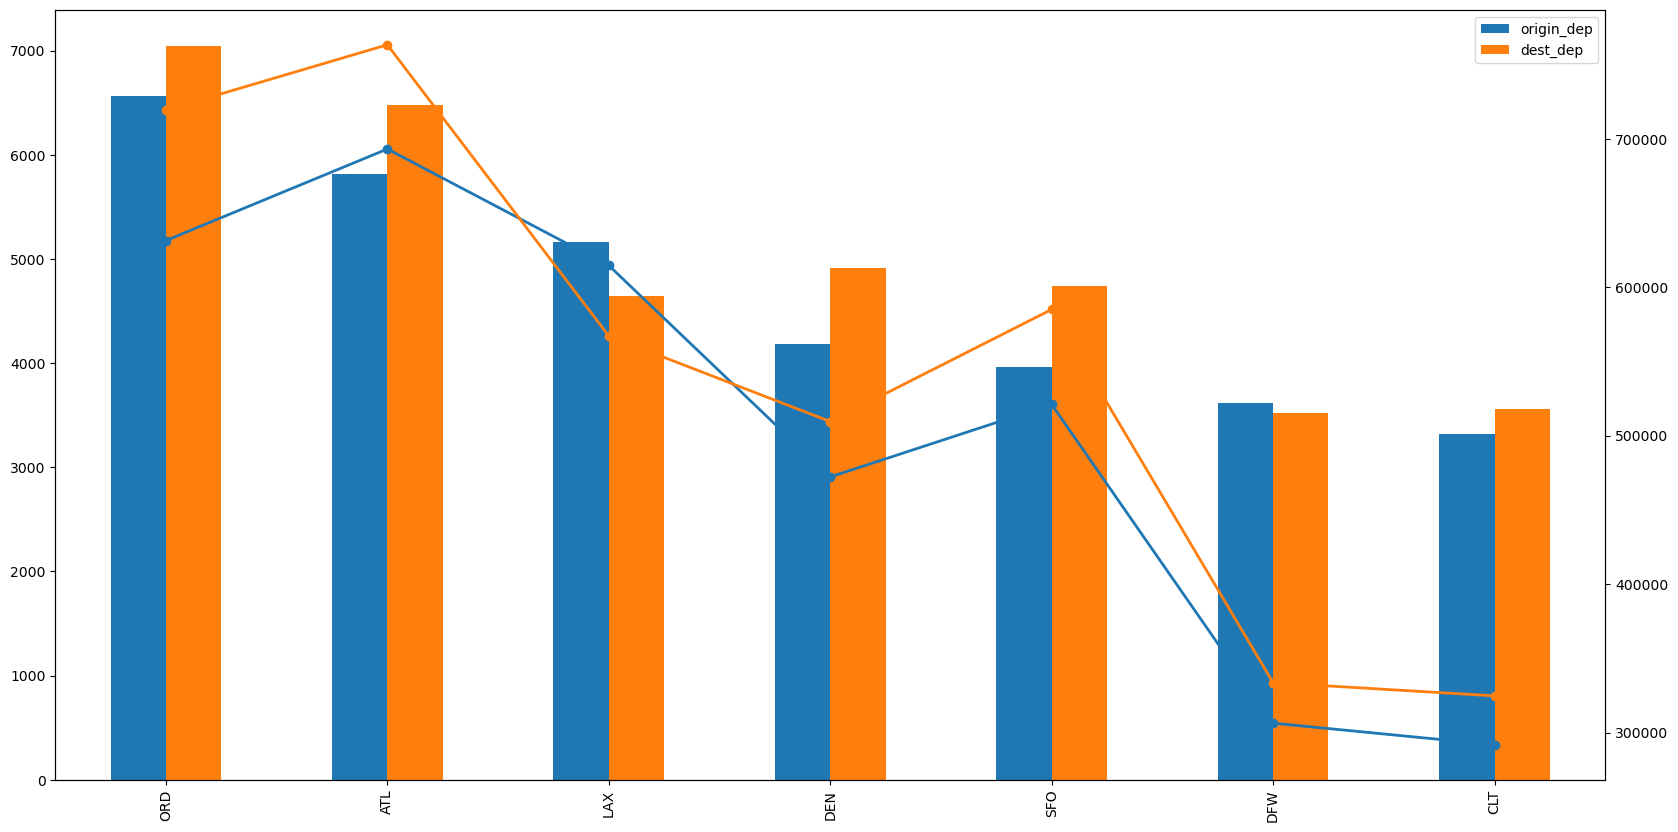

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = df9_top30[['origin_dep','dest_dep']].plot(kind='bar', use_index=True,figsize=(20,10))
ax2 = ax.twinx()


ax2.plot(ax.get_xticks(),
         df9_top30[['origin_departing_passengers','dest_departing_passengers']].values,
         linestyle='-',
         marker='o', linewidth=2.0)

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [52]:
df10 = df_TrainFlight


In [53]:
df10['fl_date'] =  pd.to_datetime(df10['fl_date'], format='%Y-%m-%d')

df10["month"] = df10["fl_date"].dt.month
df10["year"] = df10["fl_date"].dt.year


    Monthly delay and Distance covered by Air Carrier

In [54]:
#Average delays and distance covered by carriers
monthly_delay=df10.groupby(['month', 'mkt_unique_carrier'])['dep_delay'].mean()
monthly_distance=df10.groupby(['month','mkt_unique_carrier'])['distance'].sum()

In [55]:
monthly_delay


month  mkt_unique_carrier
1      AA                     5.742857
       AS                    -2.029412
       B6                    10.875000
       DL                    14.496183
       F9                     9.666667
                               ...    
12     G4                     4.846154
       HA                     2.900000
       NK                    -3.714286
       UA                     7.355372
       WN                     9.704545
Name: dep_delay, Length: 122, dtype: float64

In [56]:
monthly_distance

month  mkt_unique_carrier
1      AA                    101703
       AS                     33624
       B6                     17708
       DL                     83500
       F9                     12153
                              ...  
12     G4                     11043
       HA                      8940
       NK                     14089
       UA                    104954
       WN                     66857
Name: distance, Length: 122, dtype: int64

    Number of passengers carried by Air Carriers

In [57]:
df10_passenger = df_TrainPassenger[['passengers','unique_carrier']].groupby('unique_carrier').sum().sort_values(by='passengers', ascending=False)
df10_passenger.reset_index()


,unique_carrier,passengers
0,WN,2284948
1,DL,2127001
2,UA,1972202
3,AA,1935566
4,B6,647247
...,...,...
256,M7,0
257,M6,0
258,M3,0
259,3S,0


    Total fuel consumption per Air Carrier


In [58]:
df10_fuel = df_TrainFuel[['total_gallons','unique_carrier']].groupby('unique_carrier').sum().sort_values(by='total_gallons', ascending=False)
df10_fuel.reset_index()


,unique_carrier,total_gallons
0,DL,1.286546e+10
1,UA,1.089939e+10
2,AA,1.072396e+10
3,WN,7.227783e+09
4,FX,4.205545e+09
...,...,...
57,9E,0.000000e+00
58,OH,0.000000e+00
59,CP,0.000000e+00
60,MQ,0.000000e+00


In [59]:
#Merge

delay_dest_merged=pd.merge(monthly_delay, monthly_distance, how='left', on=['mkt_unique_carrier', 'month']).reset_index()
delay_dest_merged

,mkt_unique_carrier,month,dep_delay,distance
0,AA,1,5.742857,101703
1,AS,1,-2.029412,33624
2,B6,1,10.875000,17708
3,DL,1,14.496183,83500
4,F9,1,9.666667,12153
...,...,...,...,...
117,G4,12,4.846154,11043
118,HA,12,2.900000,8940
119,NK,12,-3.714286,14089
120,UA,12,7.355372,104954


In [60]:
delay_dest_merged=delay_dest_merged.rename(columns={'mkt_unique_carrier': 'unique_carrier'})
delay_dest_merged

,unique_carrier,month,dep_delay,distance
0,AA,1,5.742857,101703
1,AS,1,-2.029412,33624
2,B6,1,10.875000,17708
3,DL,1,14.496183,83500
4,F9,1,9.666667,12153
...,...,...,...,...
117,G4,12,4.846154,11043
118,HA,12,2.900000,8940
119,NK,12,-3.714286,14089
120,UA,12,7.355372,104954


In [61]:
pas_fuel_merged=pd.merge(df10_passenger, df10_fuel, how='left', on='unique_carrier').reset_index()
pas_fuel_merged

,unique_carrier,passengers,total_gallons
0,WN,2284948,7.227783e+09
1,DL,2127001,1.286546e+10
2,UA,1972202,1.089939e+10
3,AA,1935566,1.072396e+10
4,B6,647247,3.023077e+09
...,...,...,...
256,M7,0,NaN
257,M6,0,7.765900e+07
258,M3,0,NaN
259,3S,0,NaN


In [62]:
fuel_pass = pd.merge(delay_dest_merged, pas_fuel_merged, how = 'right', on = 'unique_carrier')
fuel_pass

,unique_carrier,month,dep_delay,distance,passengers,total_gallons
0,WN,1.0,2.318182,83309.0,2284948,7.227783e+09
1,WN,2.0,11.493827,73265.0,2284948,7.227783e+09
2,WN,3.0,8.297030,76593.0,2284948,7.227783e+09
3,WN,4.0,11.760417,67651.0,2284948,7.227783e+09
4,WN,5.0,10.612245,75172.0,2284948,7.227783e+09
...,...,...,...,...,...,...
367,M7,NaN,NaN,NaN,0,NaN
368,M6,NaN,NaN,NaN,0,7.765900e+07
369,M3,NaN,NaN,NaN,0,NaN
370,3S,NaN,NaN,NaN,0,NaN


In [63]:
fuel_pass=fuel_pass.dropna()


In [64]:
fuel_pass

,unique_carrier,month,dep_delay,distance,passengers,total_gallons
0,WN,1.0,2.318182,83309.0,2284948,7.227783e+09
1,WN,2.0,11.493827,73265.0,2284948,7.227783e+09
2,WN,3.0,8.297030,76593.0,2284948,7.227783e+09
3,WN,4.0,11.760417,67651.0,2284948,7.227783e+09
4,WN,5.0,10.612245,75172.0,2284948,7.227783e+09
...,...,...,...,...,...,...
122,G4,11.0,2.555556,6758.0,176631,6.138060e+08
123,G4,12.0,4.846154,11043.0,176631,6.138060e+08
127,VX,1.0,4.666667,4858.0,102405,4.605233e+08
128,VX,2.0,13.000000,6469.0,102405,4.605233e+08


In [65]:
fuel_pass['fuel consumpter per passenger']=fuel_pass['total_gallons']/fuel_pass['passengers']
fuel_pass['consumption per km']=fuel_pass['total_gallons']/fuel_pass['distance']

C:\Users\zarah\AppData\Local\Temp\ipykernel_25948\448288545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_pass['fuel consumpter per passenger']=fuel_pass['total_gallons']/fuel_pass['passengers']
C:\Users\zarah\AppData\Local\Temp\ipykernel_25948\448288545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_pass['consumption per km']=fuel_pass['total_gallons']/fuel_pass['distance']


In [66]:
fuel_pass.head()

,unique_carrier,month,dep_delay,distance,passengers,total_gallons,fuel consumpter per passenger,consumption per km
0,WN,1.0,2.318182,83309.0,2284948,7.227783e+09,3163.215325,86758.723907
1,WN,2.0,11.493827,73265.0,2284948,7.227783e+09,3163.215325,98652.597147
2,WN,3.0,8.297030,76593.0,2284948,7.227783e+09,3163.215325,94366.097816
3,WN,4.0,11.760417,67651.0,2284948,7.227783e+09,3163.215325,106839.256330
4,WN,5.0,10.612245,75172.0,2284948,7.227783e+09,3163.215325,96149.929894


<AxesSubplot:xlabel='dep_delay', ylabel='fuel consumpter per passenger'>

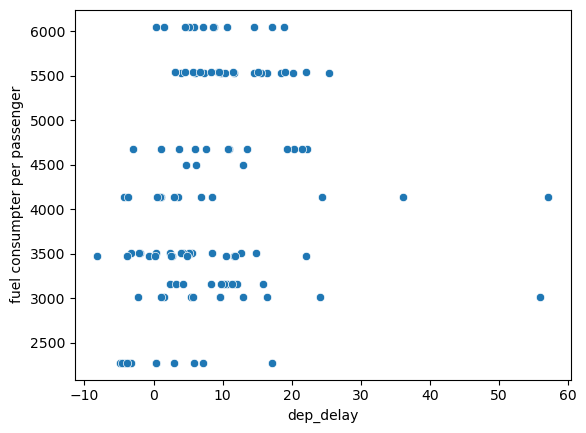

In [67]:
sns.scatterplot(data=fuel_pass, x='dep_delay', y='fuel consumpter per passenger')


<AxesSubplot:xlabel='dep_delay', ylabel='consumption per km'>

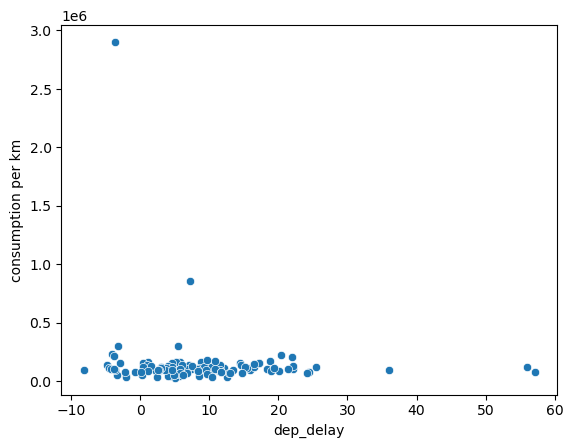

In [68]:
sns.scatterplot(data=fuel_pass, x='dep_delay', y='consumption per km')
